In [76]:
import json
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def load_tournament_data(filename="tournament_scores.json"):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    players = data["players"]
    discount = data["discount"][0]
    payoff_p1 = data["payoff_player1"][0]
    payoff_p2 = data["payoff_player2"][0]
    results = data["results"]

    return players, discount, payoff_p1, payoff_p2, results

def plot_all_matches_in_mode(filename, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    # Increase figure size for space
    fig, ax_plot = plt.subplots(figsize=(14, 6))

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]

        scores1 = match["modes"][mode]["scores_p1"]
        scores2 = match["modes"][mode]["scores_p2"]
        running1 = [sum(scores1[:i+1]) for i in range(len(scores1))]
        running2 = [sum(scores2[:i+1]) for i in range(len(scores2))]
        rounds = list(range(1, len(scores1) + 1))

        ax_plot.plot(rounds, running1, label=f"{p1} vs {p2} (P1)")
        ax_plot.plot(rounds, running2, label=f"{p1} vs {p2} (P2)", linestyle='--')

    ax_plot.set_title(f"All Matches — Game Mode {mode}")
    ax_plot.set_xlabel("Round")
    ax_plot.set_ylabel("Running Score")
    ax_plot.grid(True)

    # Move legend outside plot
    ax_plot.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize='small')

    # Format metadata with clear structure and spacing
    # info_text = (
    #     f"Discount Factor: {discount}\n\n"
    #     f"Payoff Matrix (P1):\n"
    #     f"  [C, C] = {payoff_p1[0][0]}\n"
    #     f"  [C, D] = {payoff_p1[0][1]}\n"
    #     f"  [D, C] = {payoff_p1[1][0]}\n"
    #     f"  [D, D] = {payoff_p1[1][1]}\n\n"
    #     f"Payoff Matrix (P2):\n"
    #     f"  [C, C] = {payoff_p2[0][0]}\n"
    #     f"  [C, D] = {payoff_p2[0][1]}\n"
    #     f"  [D, C] = {payoff_p2[1][0]}\n"
    #     f"  [D, D] = {payoff_p2[1][1]}"
    # )

    info_text = (
        f"Discount: {discount}\n\n"
        f"Payoff P1:\n  {payoff_p1[0]}\n  {payoff_p1[1]}\n\n"
        f"Payoff P2:\n  {payoff_p2[0]}\n  {payoff_p2[1]}"
    )
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)

    # Position metadata in bottom far-right corner of the figure
    fig.text(0.82, 0.02, info_text, fontsize=9, va='bottom', ha='left',
             family='monospace', bbox=props)

    # Adjust layout to make room for legend and info
    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)  # add vertical space too
    plt.show()

def plot_all_matches_for_player(filename, player_name, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 7))
    found = False

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]

        if player_name not in (p1, p2):
            continue  # skip unrelated matches

        found = True
        m = match["modes"][mode]

        # Get correct score mapping
        scores1 = m["scores_p1"] if p1 == player_name else m["scores_p2"]
        scores2 = m["scores_p2"] if p1 == player_name else m["scores_p1"]
        opponent = p2 if p1 == player_name else p1

        running1 = [sum(scores1[:i+1]) for i in range(len(scores1))]
        running2 = [sum(scores2[:i+1]) for i in range(len(scores2))]
        rounds = list(range(1, len(scores1) + 1))

        ax.plot(rounds, running1, label=f"{player_name} vs {opponent} (Self)")
        ax.plot(rounds, running2, label=f"{player_name} vs {opponent} (Opponent)", linestyle='--')

    if not found:
        print(f"No matches found for player: {player_name}")
        return

    # Labeling
    ax.set_title(f"All Matches for {player_name} — Game Mode {mode}")
    ax.set_xlabel("Round")
    ax.set_ylabel("Running Score")
    ax.grid(True)

    # Legend outside
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize='small')

    # Metadata text
    info_text = (
        f"Discount Factor: {discount}\n\n"
        f"Payoff Matrix (P1):\n"
        f"  [C,C] = {payoff_p1[0][0]}   [C,D] = {payoff_p1[0][1]}\n"
        f"  [D,C] = {payoff_p1[1][0]}   [D,D] = {payoff_p1[1][1]}\n\n"
        f"Payoff Matrix (P2):\n"
        f"  [C,C] = {payoff_p2[0][0]}   [C,D] = {payoff_p2[0][1]}\n"
        f"  [D,C] = {payoff_p2[1][0]}   [D,D] = {payoff_p2[1][1]}"
    )
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)
    fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace', bbox=props,
             ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)
    plt.show()

def plot_specific_match(filename, player1, player2, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]

        if {p1, p2} == {player1, player2}:
            m = match["modes"][mode]
            scores1 = m["scores_p1"] if p1 == player1 else m["scores_p2"]
            scores2 = m["scores_p2"] if p1 == player1 else m["scores_p1"]

            running1 = [sum(scores1[:i+1]) for i in range(len(scores1))]
            running2 = [sum(scores2[:i+1]) for i in range(len(scores2))]
            rounds = list(range(1, len(scores1) + 1))

            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(rounds, running1, label=player1)
            ax.plot(rounds, running2, label=player2, linestyle='--')

            ax.set_title(f"Running Score — {player1} vs {player2} — Game Mode {mode}")
            ax.set_xlabel("Round")
            ax.set_ylabel("Running Payoff")
            ax.grid(True)
            ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))

            info_text = (
                f"Discount: {discount}\n\n"
                f"Payoff P1:\n  {payoff_p1[0]}\n  {payoff_p1[1]}\n\n"
                f"Payoff P2:\n  {payoff_p2[0]}\n  {payoff_p2[1]}"
            )
            props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)
            fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace', bbox=props,
                     ha='left', va='bottom')

            plt.tight_layout()
            plt.subplots_adjust(right=0.75, bottom=0.2)
            plt.show()
            return

    print(f"Match not found: {player1} vs {player2}")

def plot_utilitarian_all_matches_in_mode(filename, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)
    fig, ax = plt.subplots(figsize=(14, 7))

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]
        m = match["modes"][mode]
        scores1 = m["scores_p1"]
        scores2 = m["scores_p2"]

        utilitarian = [sum(scores1[:i+1]) + sum(scores2[:i+1]) for i in range(len(scores1))]
        rounds = list(range(1, len(scores1) + 1))
        ax.plot(rounds, utilitarian, label=f"{p1} vs {p2}")

    ax.set_title(f"Utilitarian Payoff — All Matches — Game Mode {mode}")
    ax.set_xlabel("Round")
    ax.set_ylabel("Cumulative Total Payoff (P1 + P2)")
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize='small')

    # Metadata box
    info_text = (
        f"Discount: {discount}\n\n"
        f"P1 Matrix:\n[C,C]={payoff_p1[0][0]}, [C,D]={payoff_p1[0][1]}\n"
        f"[D,C]={payoff_p1[1][0]}, [D,D]={payoff_p1[1][1]}\n\n"
        f"P2 Matrix:\n[C,C]={payoff_p2[0][0]}, [C,D]={payoff_p2[0][1]}\n"
        f"[D,C]={payoff_p2[1][0]}, [D,D]={payoff_p2[1][1]}"
    )
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)
    fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace', bbox=props, ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)
    plt.show()

def plot_utilitarian_all_matches_for_player(filename, player_name, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)
    fig, ax = plt.subplots(figsize=(14, 7))
    found = False

    for match in results:
        p1, p2 = match["player1"], match["player2"]
        if player_name not in (p1, p2):
            continue

        found = True
        m = match["modes"][mode]
        scores1 = m["scores_p1"] if p1 == player_name else m["scores_p2"]
        scores2 = m["scores_p2"] if p1 == player_name else m["scores_p1"]

        util = [sum(scores1[:i+1]) + sum(scores2[:i+1]) for i in range(len(scores1))]
        rounds = list(range(1, len(scores1) + 1))
        opponent = p2 if p1 == player_name else p1
        ax.plot(rounds, util, label=f"{player_name} vs {opponent}")

    if not found:
        print(f"No matches found for {player_name}")
        return

    ax.set_title(f"Utilitarian Payoff — {player_name} — Game Mode {mode}")
    ax.set_xlabel("Round")
    ax.set_ylabel("Cumulative Total Payoff")
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), fontsize='small')
    ax.grid(True)

    info_text = (
        f"Discount: {discount}\n\n"
        f"P1 Matrix:\n[C,C]={payoff_p1[0][0]}, [C,D]={payoff_p1[0][1]}\n"
        f"[D,C]={payoff_p1[1][0]}, [D,D]={payoff_p1[1][1]}\n\n"
        f"P2 Matrix:\n[C,C]={payoff_p2[0][0]}, [C,D]={payoff_p2[0][1]}\n"
        f"[D,C]={payoff_p2[1][0]}, [D,D]={payoff_p2[1][1]}"
    )
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)
    fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace', bbox=props, ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)
    plt.show()

def plot_utilitarian_specific_match(filename, player1, player2, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    for match in results:
        p1, p2 = match["player1"], match["player2"]
        if {p1, p2} != {player1, player2}:
            continue

        m = match["modes"][mode]
        scores1 = m["scores_p1"] if p1 == player1 else m["scores_p2"]
        scores2 = m["scores_p2"] if p1 == player1 else m["scores_p1"]

        util = [sum(scores1[:i+1]) + sum(scores2[:i+1]) for i in range(len(scores1))]
        rounds = list(range(1, len(scores1) + 1))

        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(rounds, util, label="Total (P1 + P2)")

        ax.set_title(f"Utilitarian Score — {player1} vs {player2} — Mode {mode}")
        ax.set_xlabel("Round")
        ax.set_ylabel("Cumulative Payoff")
        ax.grid(True)
        ax.legend()

        info_text = (
            f"Discount: {discount}\n\n"
            f"P1 Matrix:\n[C,C]={payoff_p1[0][0]}, [C,D]={payoff_p1[0][1]}\n"
            f"[D,C]={payoff_p1[1][0]}, [D,D]={payoff_p1[1][1]}\n\n"
            f"P2 Matrix:\n[C,C]={payoff_p2[0][0]}, [C,D]={payoff_p2[0][1]}\n"
            f"[D,C]={payoff_p2[1][0]}, [D,D]={payoff_p2[1][1]}"
        )
        props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)
        fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace', bbox=props, ha='left', va='bottom')

        plt.tight_layout()
        plt.subplots_adjust(right=0.75, bottom=0.2)
        plt.show()
        return

    print(f"Match not found: {player1} vs {player2}")

def plot_egalitarian_all_matches_in_mode(filename, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    fig, ax = plt.subplots(figsize=(14, 7))

    for match in results:
        p1, p2 = match["player1"], match["player2"]
        m = match["modes"][mode]

        scores1 = m["scores_p1"]
        scores2 = m["scores_p2"]
        egal = [min(sum(scores1[:i+1]), sum(scores2[:i+1])) for i in range(len(scores1))]
        rounds = list(range(1, len(scores1) + 1))

        ax.plot(rounds, egal, label=f"{p1} vs {p2}")

    ax.set_title(f"Egalitarian Scores — All Matches — Mode {mode}")
    ax.set_xlabel("Round")
    ax.set_ylabel("Cumulative Min(P1, P2)")
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='small')

    info_text = (
        f"Discount: {discount}\n\n"
        f"P1 Matrix:\n[C,C]={payoff_p1[0][0]}, [C,D]={payoff_p1[0][1]}\n"
        f"[D,C]={payoff_p1[1][0]}, [D,D]={payoff_p1[1][1]}\n\n"
        f"P2 Matrix:\n[C,C]={payoff_p2[0][0]}, [C,D]={payoff_p2[0][1]}\n"
        f"[D,C]={payoff_p2[1][0]}, [D,D]={payoff_p2[1][1]}"
    )
    fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace',
             bbox=dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95),
             ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)
    plt.show()

def plot_egalitarian_all_matches_for_player(filename, player_name, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    fig, ax = plt.subplots(figsize=(14, 7))

    for match in results:
        p1, p2 = match["player1"], match["player2"]
        if player_name not in {p1, p2}:
            continue

        m = match["modes"][mode]
        scores1 = m["scores_p1"] if p1 == player_name else m["scores_p2"]
        scores2 = m["scores_p2"] if p1 == player_name else m["scores_p1"]
        opponent = p2 if p1 == player_name else p1
        egal = [min(sum(scores1[:i+1]), sum(scores2[:i+1])) for i in range(len(scores1))]
        rounds = list(range(1, len(scores1) + 1))

        ax.plot(rounds, egal, label=f"{player_name} vs {opponent}")

    ax.set_title(f"Egalitarian Scores — All Matches for {player_name} — Mode {mode}")
    ax.set_xlabel("Round")
    ax.set_ylabel("Cumulative Min(P1, P2)")
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='small')

    info_text = (
        f"Discount: {discount}\n\n"
        f"P1 Matrix:\n[C,C]={payoff_p1[0][0]}, [C,D]={payoff_p1[0][1]}\n"
        f"[D,C]={payoff_p1[1][0]}, [D,D]={payoff_p1[1][1]}\n\n"
        f"P2 Matrix:\n[C,C]={payoff_p2[0][0]}, [C,D]={payoff_p2[0][1]}\n"
        f"[D,C]={payoff_p2[1][0]}, [D,D]={payoff_p2[1][1]}"
    )
    fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace',
             bbox=dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95),
             ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)
    plt.show()

def plot_egalitarian_specific_match(filename, player1, player2, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)

    for match in results:
        p1, p2 = match["player1"], match["player2"]
        if {p1, p2} != {player1, player2}:
            continue

        m = match["modes"][mode]
        scores1 = m["scores_p1"] if p1 == player1 else m["scores_p2"]
        scores2 = m["scores_p2"] if p1 == player1 else m["scores_p1"]
        egal = [min(sum(scores1[:i+1]), sum(scores2[:i+1])) for i in range(len(scores1))]
        rounds = list(range(1, len(scores1) + 1))

        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(rounds, egal, label=f"Egalitarian: min({player1}, {player2})")

        ax.set_title(f"Egalitarian Score — {player1} vs {player2} — Mode {mode}")
        ax.set_xlabel("Round")
        ax.set_ylabel("Cumulative Min(P1, P2)")
        ax.grid(True)
        ax.legend()

        info_text = (
            f"Discount: {discount}\n\n"
            f"P1 Matrix:\n[C,C]={payoff_p1[0][0]}, [C,D]={payoff_p1[0][1]}\n"
            f"[D,C]={payoff_p1[1][0]}, [D,D]={payoff_p1[1][1]}\n\n"
            f"P2 Matrix:\n[C,C]={payoff_p2[0][0]}, [C,D]={payoff_p2[0][1]}\n"
            f"[D,C]={payoff_p2[1][0]}, [D,D]={payoff_p2[1][1]}"
        )
        fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace',
                 bbox=dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95),
                 ha='left', va='bottom')

        plt.tight_layout()
        plt.subplots_adjust(right=0.75, bottom=0.2)
        plt.show()
        return

    print(f"Match not found: {player1} vs {player2}")

def plot_average_scores_bar(filename, mode):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)
    player_scores = {p: [] for p in players}

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]
        m = match["modes"][mode]
        player_scores[p1].extend(m["scores_p1"])
        player_scores[p2].extend(m["scores_p2"])

    avg_scores = {p: sum(scores) / len(scores) if scores else 0 for p, scores in player_scores.items()}

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(avg_scores.keys(), avg_scores.values(), color='skyblue')
    ax.set_title(f"Avg Per-Round Scores — Game Mode {mode}")
    ax.set_ylabel("Average Score")
    ax.set_xlabel("Player")
    ax.grid(axis='y')
    plt.xticks(rotation=45)

    info_text = (
        f"Discount: {discount}\n\n"
        f"Payoff P1:\n  {payoff_p1[0]}\n  {payoff_p1[1]}\n\n"
        f"Payoff P2:\n  {payoff_p2[0]}\n  {payoff_p2[1]}"
    )
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)
    fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace', bbox=props,
             ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)
    plt.show()

def plot_average_scores_all_modes(filename):
    players, discount, payoff_p1, payoff_p2, results = load_tournament_data(filename)
    mode_count = 6
    player_mode_scores = {p: [0]*mode_count for p in players}
    player_mode_counts = {p: [0]*mode_count for p in players}

    for match in results:
        p1 = match["player1"]
        p2 = match["player2"]

        for m in match["modes"]:
            mode = m["mode"]
            player_mode_scores[p1][mode] += sum(m["scores_p1"])
            player_mode_scores[p2][mode] += sum(m["scores_p2"])
            player_mode_counts[p1][mode] += len(m["scores_p1"])
            player_mode_counts[p2][mode] += len(m["scores_p2"])

    avg_by_mode = {
        p: [
            (player_mode_scores[p][m] / player_mode_counts[p][m]) if player_mode_counts[p][m] else 0
            for m in range(mode_count)
        ]
        for p in players
    }

    fig, ax = plt.subplots(figsize=(14, 6))
    x = range(mode_count)
    bar_width = 0.15

    for idx, player in enumerate(players):
        offsets = [i + bar_width * idx for i in x]
        ax.bar(offsets, avg_by_mode[player], width=bar_width, label=player)

    ax.set_xticks([i + bar_width * (len(players)/2) for i in x])
    ax.set_xticklabels([f"Mode {m}" for m in range(mode_count)])
    ax.set_ylabel("Avg Round Score")
    ax.set_title("Average Per-Round Scores per Mode")
    ax.grid(axis='y')
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))

    info_text = (
        f"Discount: {discount}\n\n"
        f"Payoff P1:\n  {payoff_p1[0]}\n  {payoff_p1[1]}\n\n"
        f"Payoff P2:\n  {payoff_p2[0]}\n  {payoff_p2[1]}"
    )
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.95)
    fig.text(0.82, 0.02, info_text, fontsize=9, family='monospace', bbox=props,
             ha='left', va='bottom')

    plt.tight_layout()
    plt.subplots_adjust(right=0.75, bottom=0.2)
    plt.show()



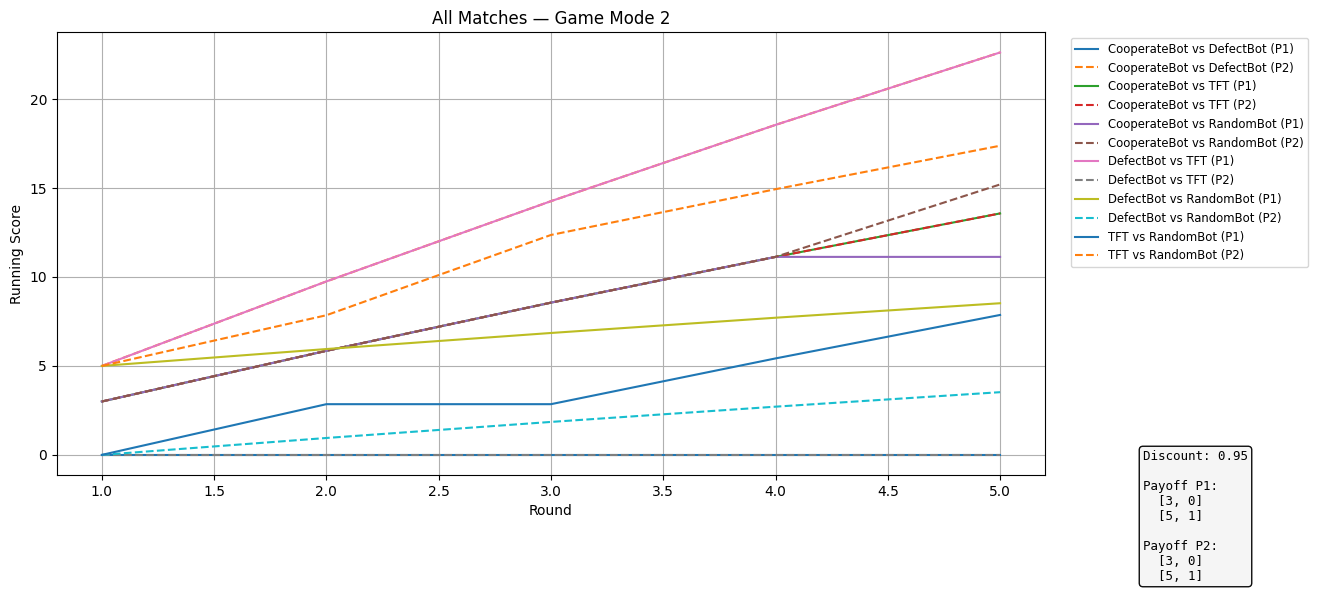

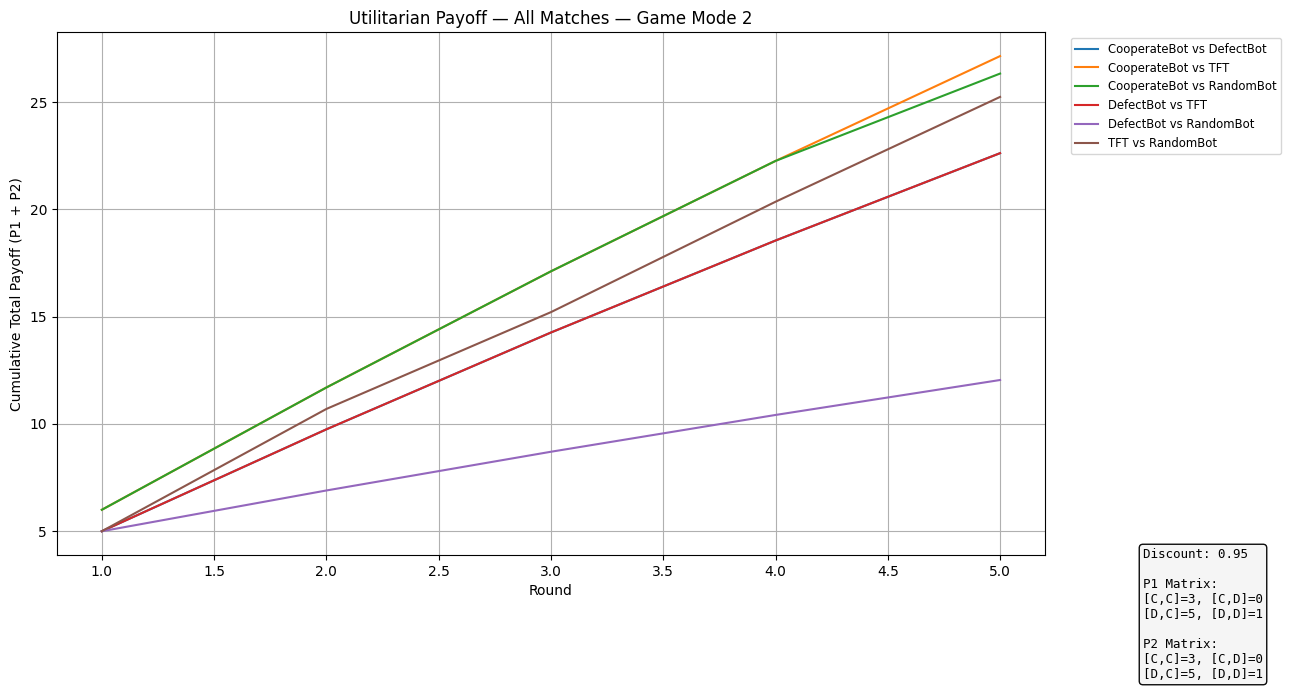

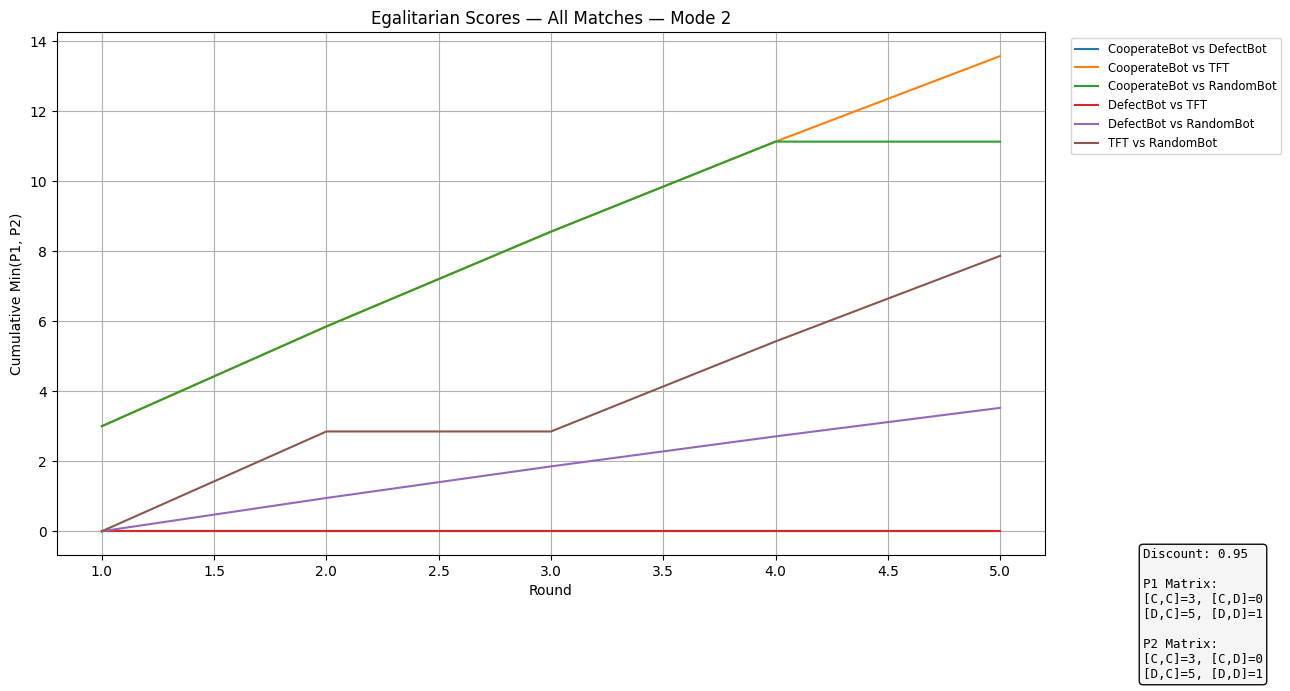

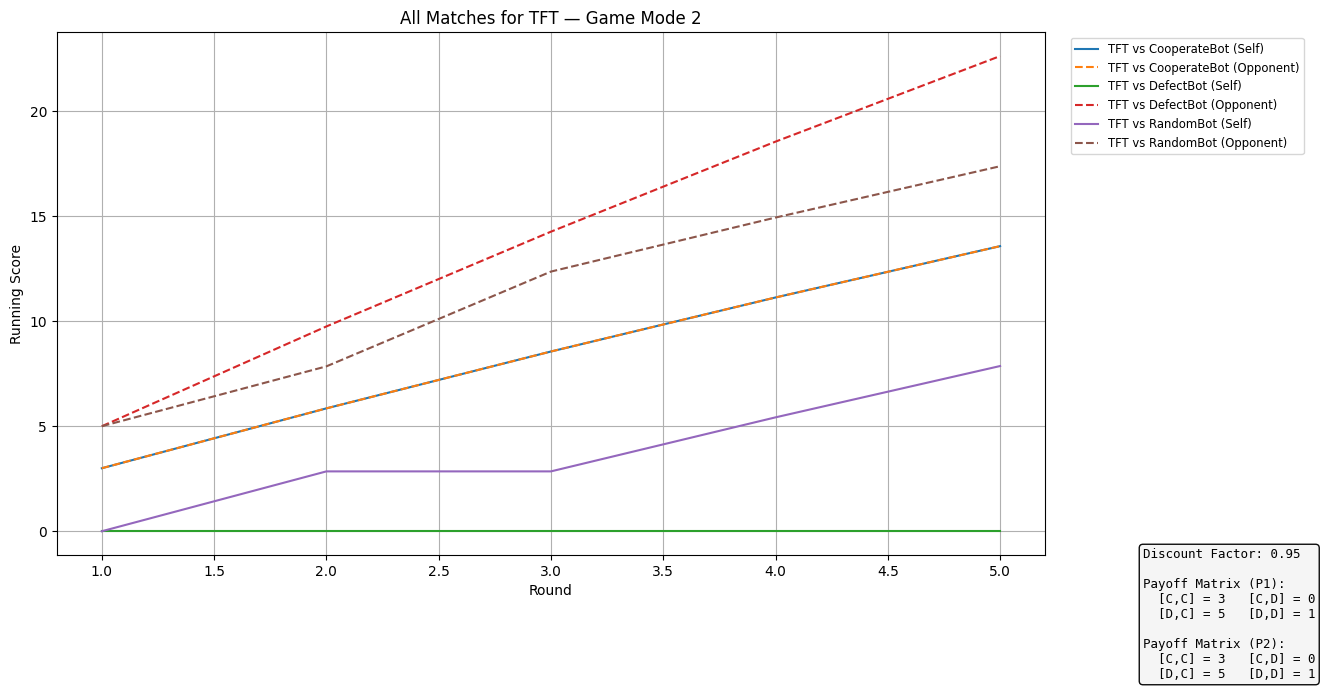

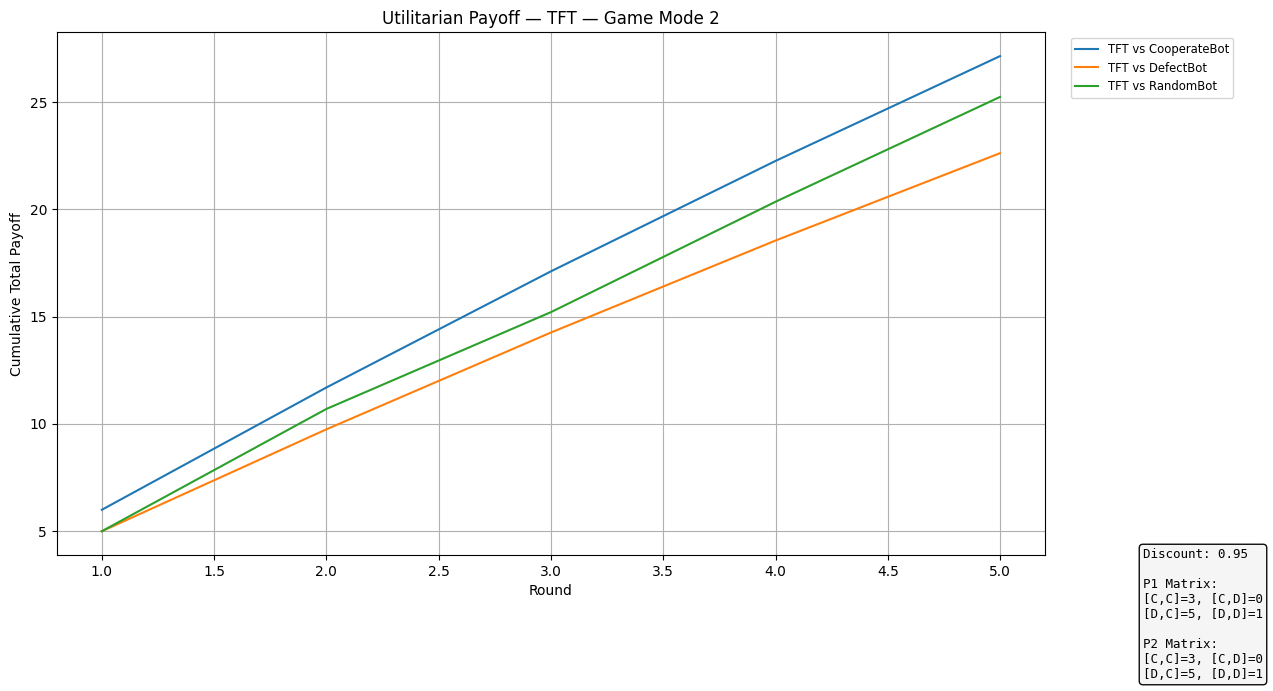

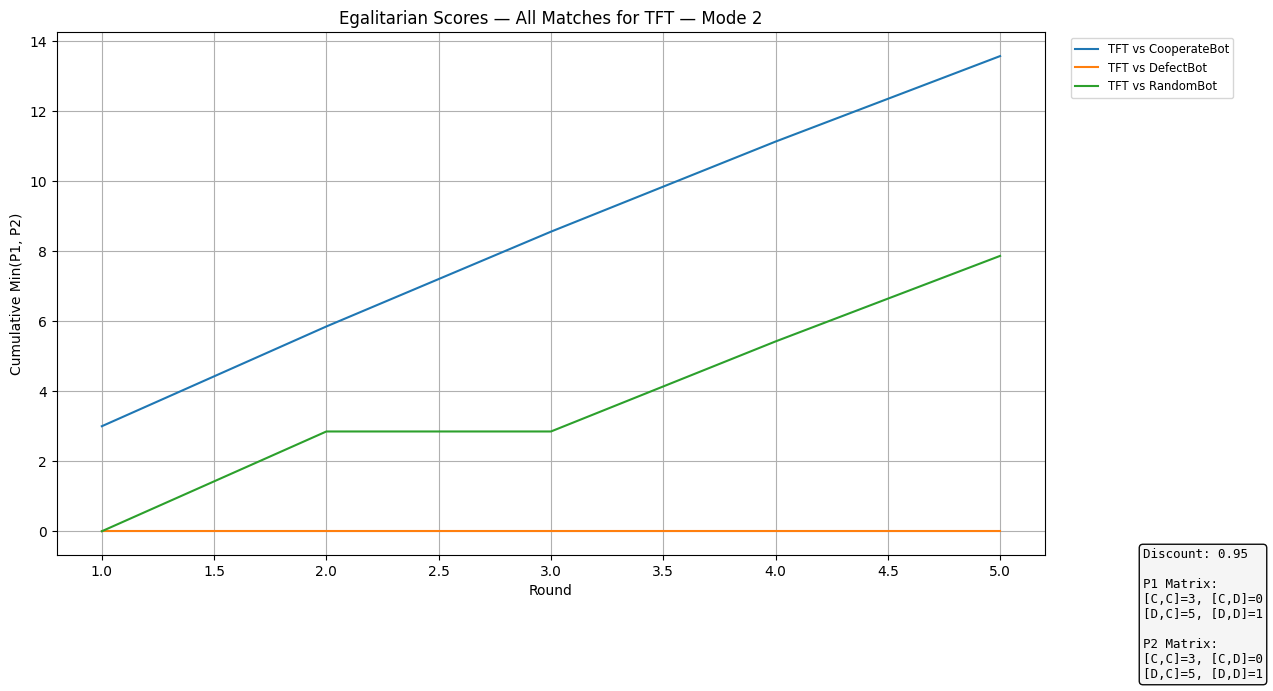

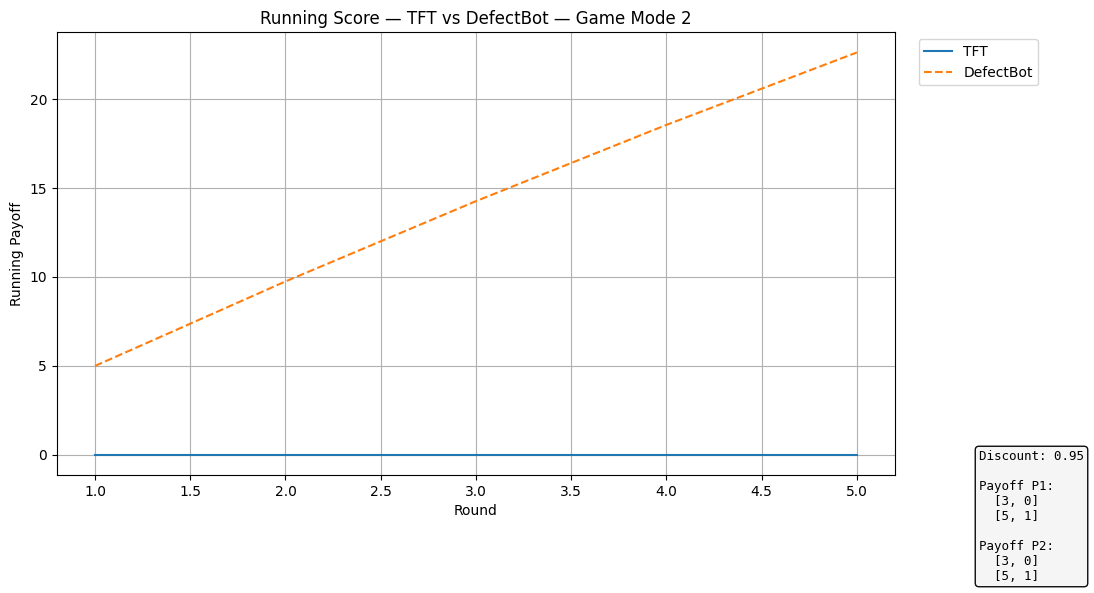

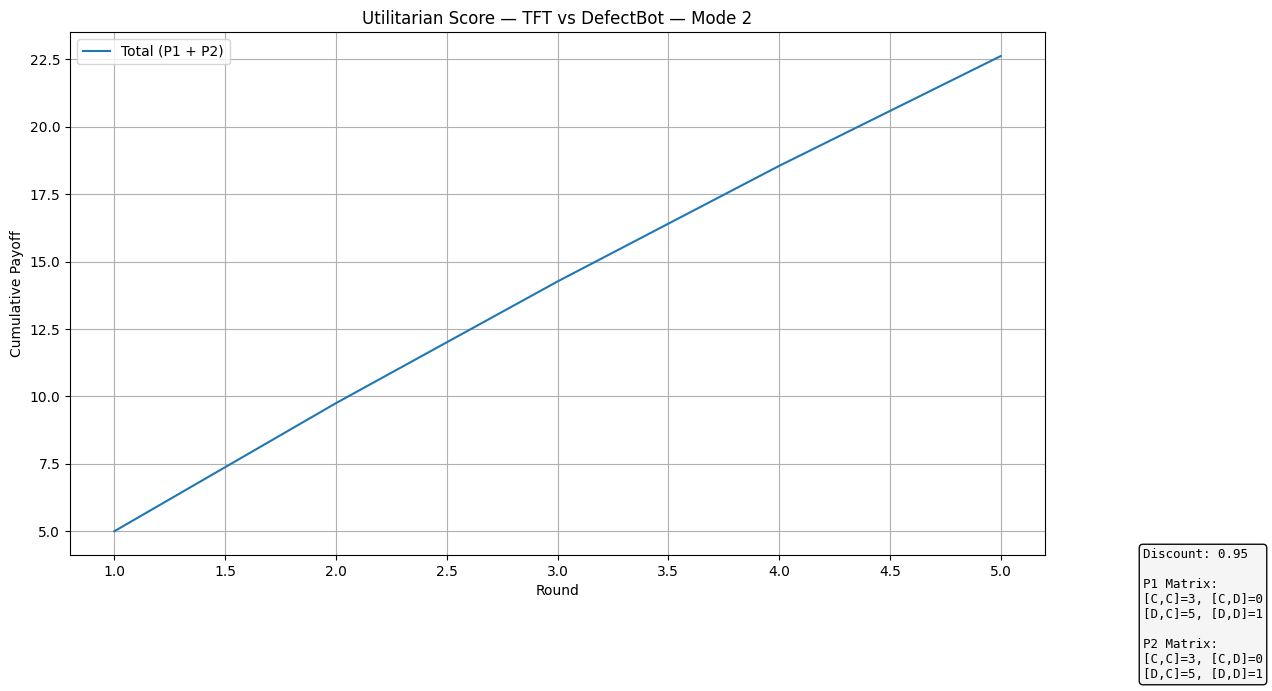

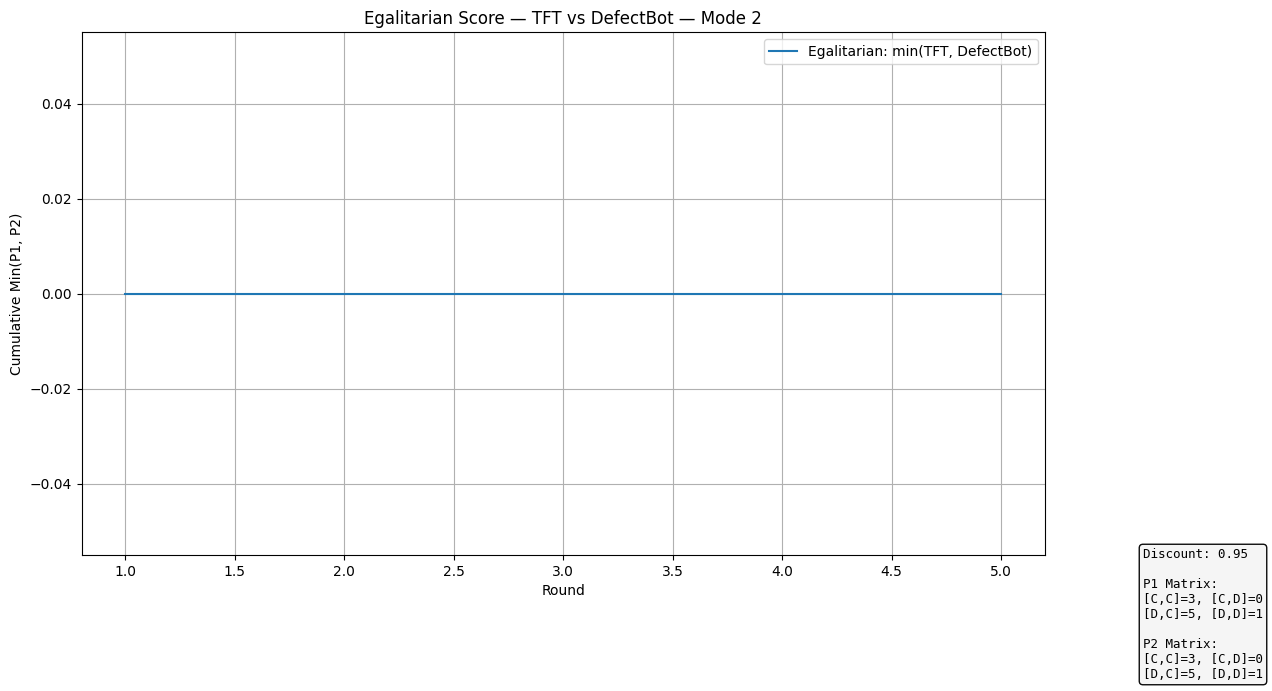

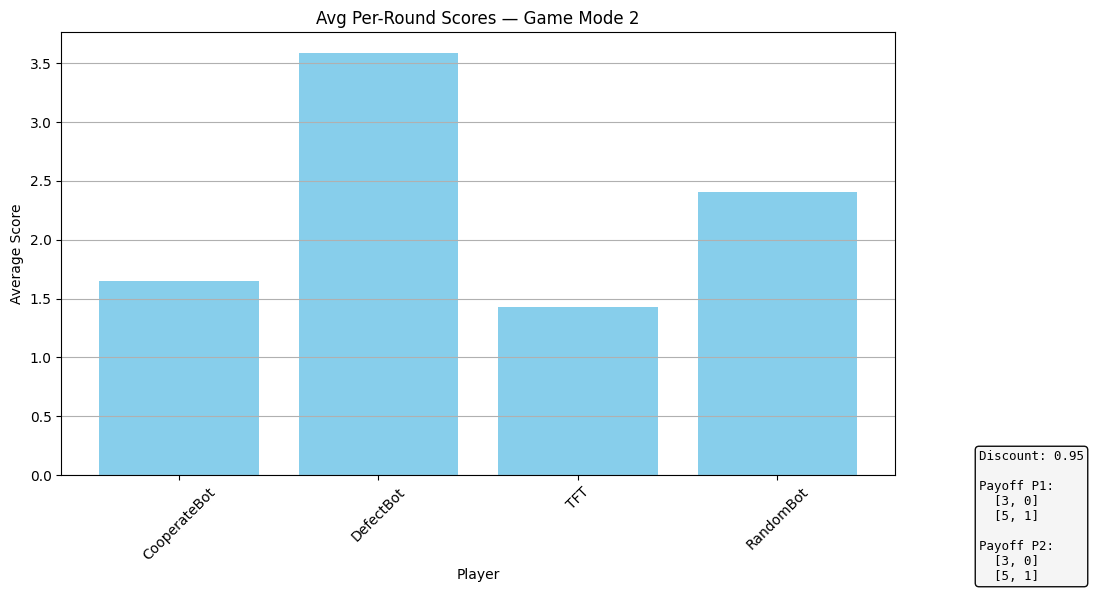

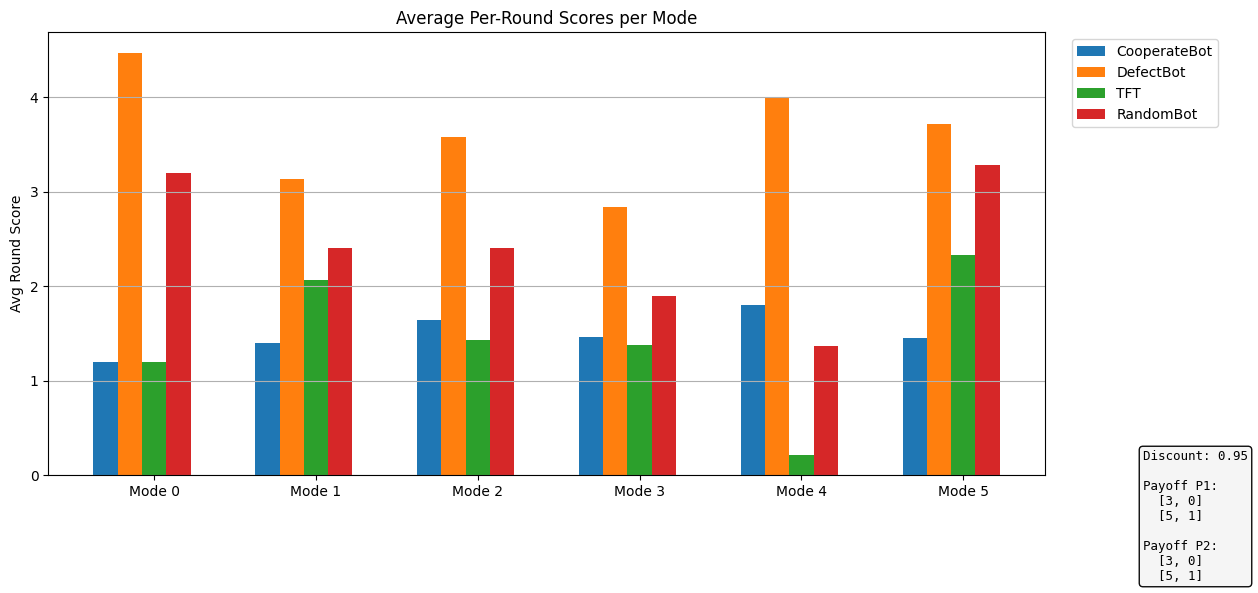

In [78]:
plot_all_matches_in_mode(filename="tournament_scores.json", mode=2)
plot_utilitarian_all_matches_in_mode(filename="tournament_scores.json", mode=2)
plot_egalitarian_all_matches_in_mode(filename="tournament_scores.json", mode=2)

plot_all_matches_for_player(filename="tournament_scores.json", player_name="TFT", mode=2)
plot_utilitarian_all_matches_for_player(filename="tournament_scores.json", player_name="TFT", mode=2)
plot_egalitarian_all_matches_for_player(filename="tournament_scores.json", player_name="TFT", mode=2)

plot_specific_match(filename="tournament_scores.json", player1="TFT", player2="DefectBot", mode=2)
plot_utilitarian_specific_match(filename="tournament_scores.json", player1="TFT", player2="DefectBot", mode=2)
plot_egalitarian_specific_match(filename="tournament_scores.json", player1="TFT", player2="DefectBot", mode=2)

plot_average_scores_bar(filename="tournament_scores.json", mode=2)

plot_average_scores_all_modes(filename="tournament_scores.json")
